In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import xesmf as xe

In [2]:
infile_LR = ('/ihesp/archive/LR/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002/ocn/hist/'
             'b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002.pop.h.nday1.0066-07-01.nc')
ds_LR = xr.open_dataset(infile_LR)
print(ds_LR)

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 384, nlon: 320, time: 31, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                (time) object 0066-07-02 00:00:00 ... 0066-08-01 00:00:00
  * z_t                 (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 525000.94 549999.06
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w

In [3]:
print(ds_LR.SST)

<xarray.DataArray 'SST' (time: 31, nlat: 384, nlon: 320)>
[3809280 values with dtype=float32]
Coordinates:
  * time     (time) object 0066-07-02 00:00:00 ... 0066-08-01 00:00:00
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean


In [4]:
sst_raw = ds_LR.SST.isel(time=0)
print(sst_raw)

<xarray.DataArray 'SST' (nlat: 384, nlon: 320)>
[122880 values with dtype=float32]
Coordinates:
    time     object 0066-07-02 00:00:00
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean


regrid POP grids following the example on https://xesmf.readthedocs.io/en/latest/notebooks/Curvilinear_grid.html

In [5]:
ds_LR_rn = ds_LR.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
print(ds_LR_rn)

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 384, nlon: 320, time: 31, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                (time) object 0066-07-02 00:00:00 ... 0066-08-01 00:00:00
  * z_t                 (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 525000.94 549999.06
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    lon                 (nlat, nlon) float64 ...
    lat                 (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w

In [6]:
# create target grid, 1x1 degree rectilinear
ds_LR_out = xe.util.grid_global(1, 1)
print(ds_LR_out)

<xarray.Dataset>
Dimensions:  (x: 360, x_b: 361, y: 180, y_b: 181)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*


In [7]:
regridder = xe.Regridder(ds_LR_rn, ds_LR_out, method='bilinear')
regridder  # print basic regridder information.

Create weight file: bilinear_384x320_180x360.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_384x320_180x360.nc 
Reuse pre-computed weights? False 
Input grid shape:           (384, 320) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('y', 'x') 
Periodic in longitude?      False

In [8]:
sst_rgd = regridder(sst_raw) # rgd: regrid
print(sst_rgd)

<xarray.DataArray 'SST' (y: 180, x: 360)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.68241548, -1.68252195, -1.68263063, ..., -1.68210838,
        -1.6822088 , -1.68231113],
       [-1.678212  , -1.67830165, -1.67838964, ..., -1.67793339,
        -1.67802783, -1.67812071],
       [-1.67598422, -1.67604552, -1.67610631, ..., -1.67579753,
        -1.67586021, -1.67592244]])
Coordinates:
    time     object 0066-07-02 00:00:00
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear


plot two grids

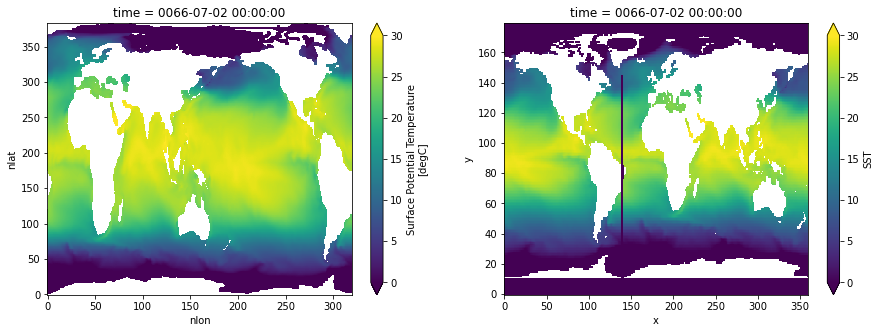

In [9]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sst_raw.plot(ax=axes[0],vmin=0,vmax=30)
sst_rgd.plot(ax=axes[1],vmin=0,vmax=30)
plt.savefig('RegridPOPgridsUsingXESMF_2020Jul09.png',bbox_inches='tight')